# Time Series Analysis and Forecasting for Bike Rental Data

### This notebook is dedicated to the analysis, preprocessing, and forecasting of time series data associated with bicycle rentals from a specific store. It aims to provide insights into rental patterns and predict future demand.


In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso

from sklearn.ensemble import RandomForestRegressor

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [ ]:
mean_squared_error()

In [81]:
df = pd.read_csv(r'daily-bike-share.csv')

In [3]:
df.shape

(731, 13)

In [6]:
df.tail(10)

,day,mnth,year,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
721,22,12,2012,1,0,6,0,1,0.265833,0.236113,0.441250,0.407346,205
722,23,12,2012,1,0,0,0,1,0.245833,0.259471,0.515417,0.133083,408
723,24,12,2012,1,0,1,1,2,0.231304,0.258900,0.791304,0.077230,174
724,25,12,2012,1,1,2,0,2,0.291304,0.294465,0.734783,0.168726,440
725,26,12,2012,1,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9
726,27,12,2012,1,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,28,12,2012,1,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,29,12,2012,1,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,30,12,2012,1,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364
730,31,12,2012,1,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   day         731 non-null    int64  
 1   mnth        731 non-null    int64  
 2   year        731 non-null    int64  
 3   season      731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  rentals     731 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.4 KB


In [11]:
df[['temp', 'atemp', 'hum', 'windspeed']].describe()

,temp,atemp,hum,windspeed
count,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486
std,0.183051,0.162961,0.142429,0.077498
min,0.059130,0.079070,0.000000,0.022392
25%,0.337083,0.337842,0.520000,0.134950
50%,0.498333,0.486733,0.626667,0.180975
75%,0.655417,0.608602,0.730209,0.233214
max,0.861667,0.840896,0.972500,0.507463


In [17]:
df.head()

,day,mnth,year,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [78]:
# For the purpose of simplicity we will use only the time variables and "rentals" and "holiday" in this first moment.
variables = ['rentals', 'temp']

# Train - Validation

In [82]:
train = df.loc[:669].copy()
test = df.loc[670:].copy()
train.shape, test.shape

((670, 13), (61, 13))

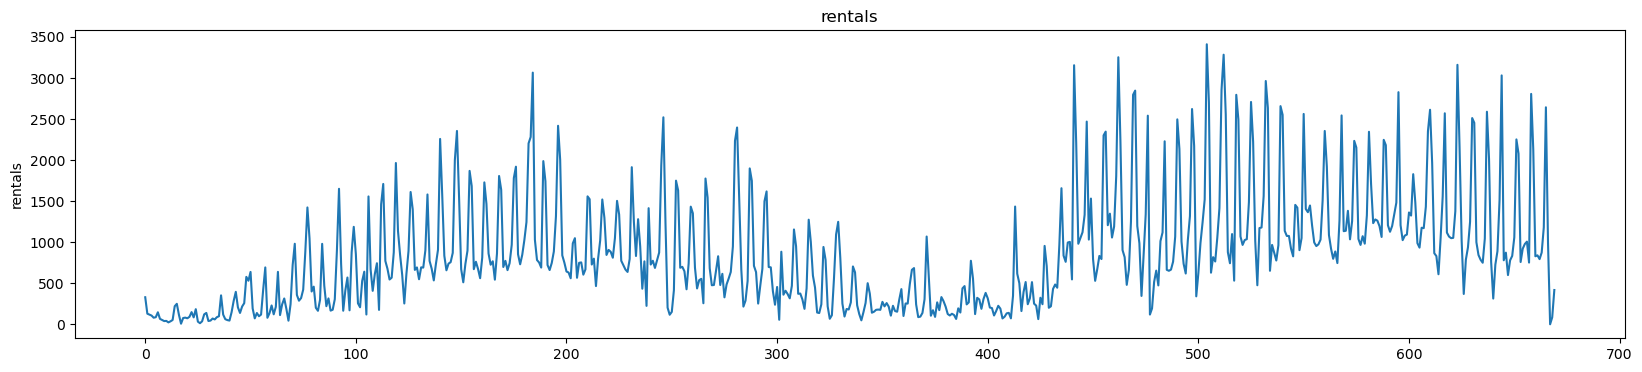

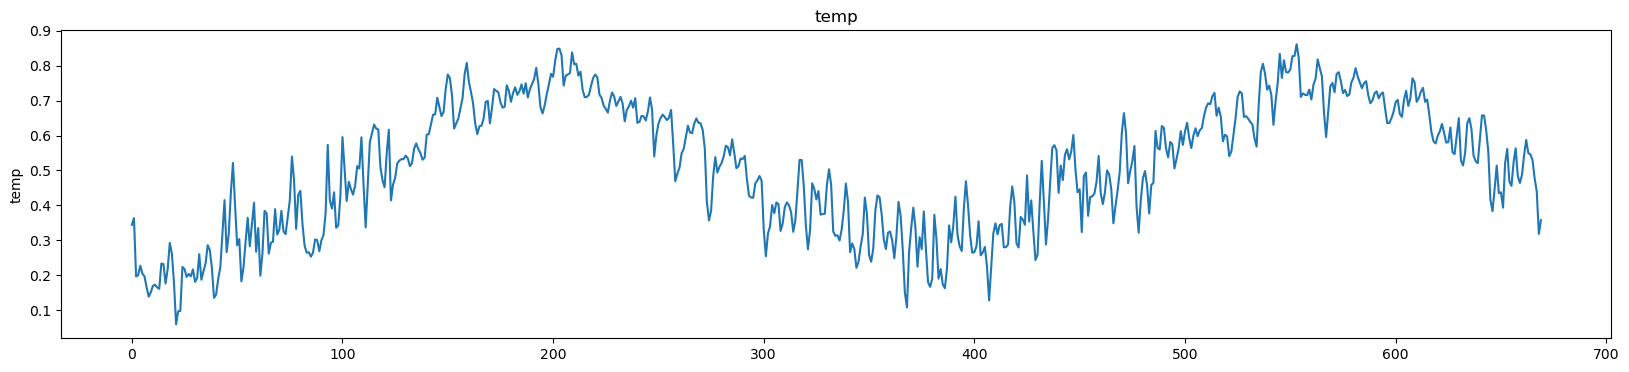

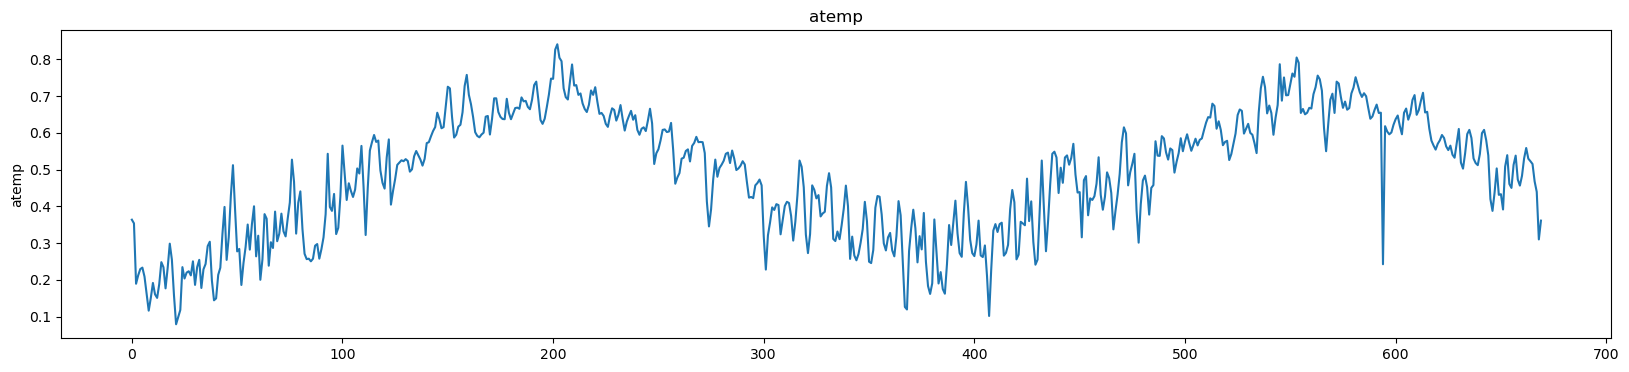

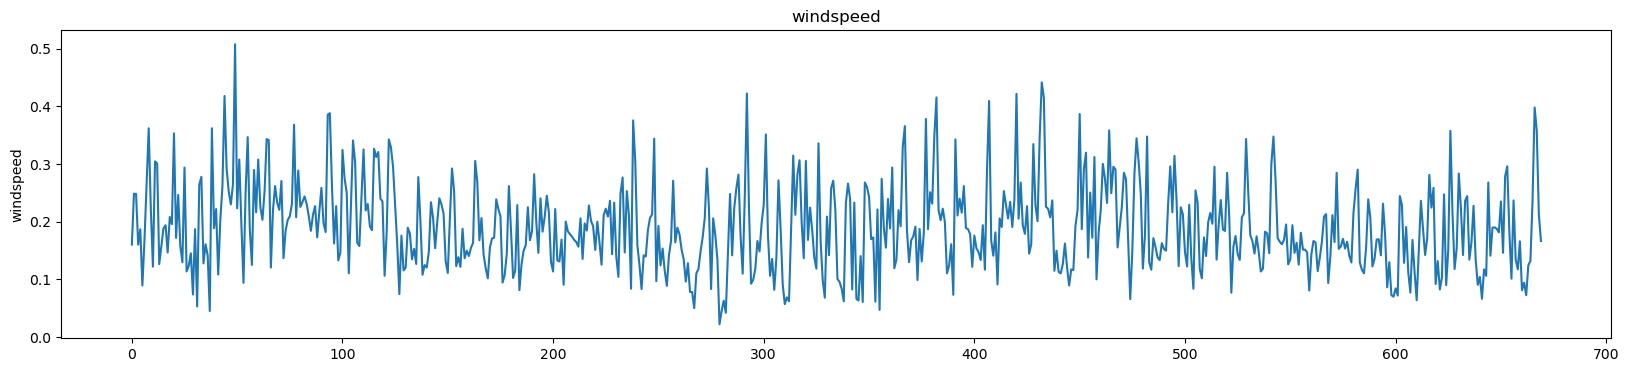

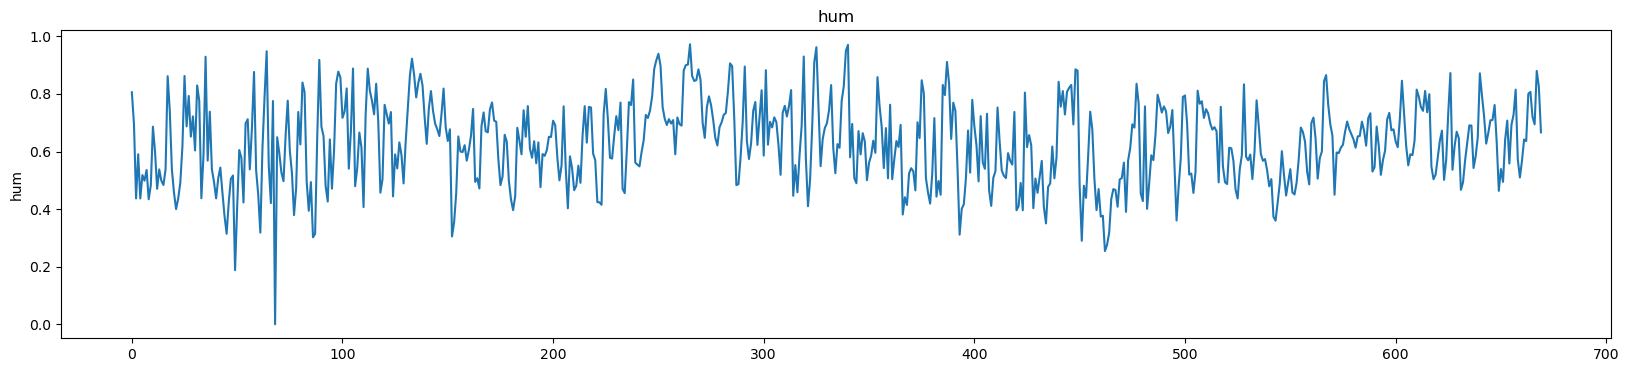

In [63]:
# Plotting some graphcs to see if there is any kind of correlation between the variables
for var in ['rentals', 'temp', 'atemp', 'windspeed', 'hum']:
    # Plot the time series
    train[var].plot(figsize=(20,4))
    # Add title
    plt.title(var)
    # the y axis label
    plt.ylabel(var)
    plt.show()

In [83]:
# Capture "time" in a new variable.
mnth_ = train['mnth']
# transforming the variable day_ extracted in a pandas Series
mnth_ = pd.Series(mnth_, index = df.index)
mnth_.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: mnth, dtype: float64

Text(0, 0.5, 'Rentals')

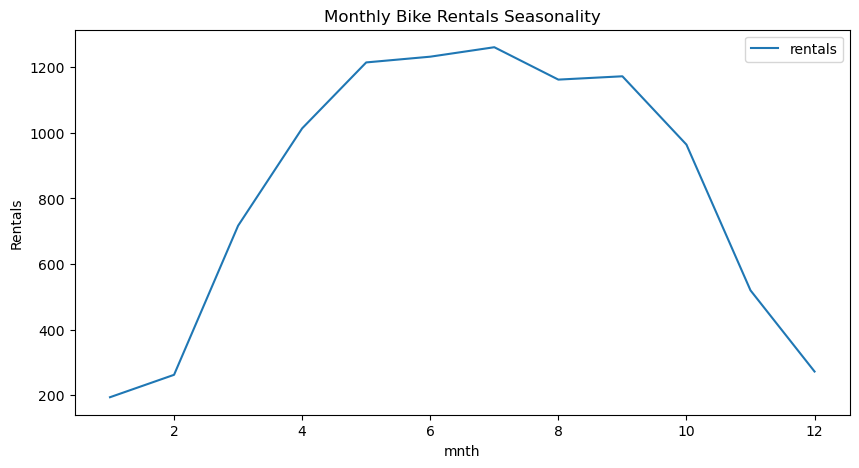

In [84]:
# Plot the average pollutant concentration per hour
train.groupby(mnth_)[['rentals']].mean().plot(figsize=(10, 5))
#plt.axvline(x=day_[4], color = 'green')
plt.title('Monthly Bike Rentals Seasonality')
plt.ylabel('Rentals')

Text(0, 0.5, 'Temperature')

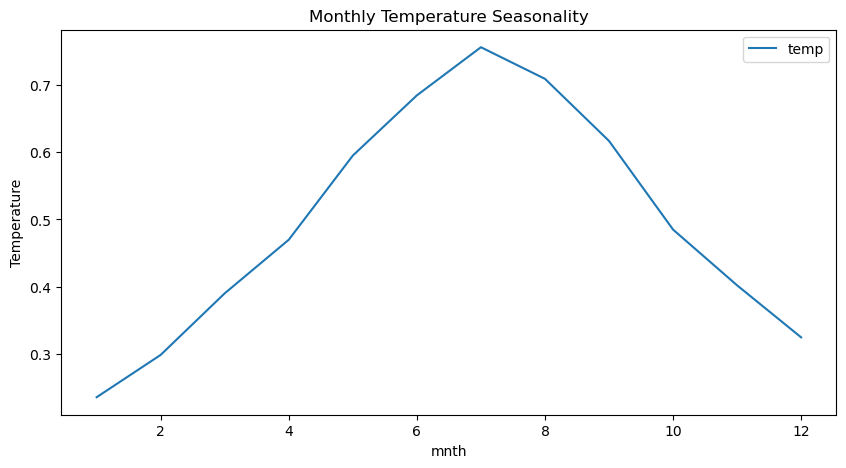

In [68]:
# Plot the average pollutant concentration per hour
df.groupby(mnth_)[['temp']].mean().plot(figsize=(10, 5))
#plt.axvline(x=day_[4], color = 'green')
plt.title('Monthly Temperature Seasonality')
plt.ylabel('Temperature')

In [150]:
# Here, I show how to move foward by, 1 hr,
# so that the pollutant concentration from the previous
# hour (t-1) is alligned with the current hour (t),
# which is the timestamp we want to make predictions about
def lag_features_1(df):
    # Shift the data foward 1 Hr
    tmp = df[variables].shift(1)
    # Name the new variables
    tmp.columns = [v + '_lag_1' for v in variables]
    # Add the variables to the original data.
    print('data size before')
    print(df.shape)
    df = df.merge(tmp, left_index=True, right_index=True, how='left')
    print('data size after')
    print(df.shape)
    return df

train = lag_features_1(train)
test = lag_features_1(test)

data size before
(670, 13)
data size after
(670, 15)
data size before
(61, 13)
data size after
(61, 15)


In [151]:
train.head()

,day,mnth,year,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,rentals_lag_1,temp_lag_1
0,1,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,NaN,NaN
1,2,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,331.0,0.344167
2,3,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,131.0,0.363478
3,4,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,120.0,0.196364
4,5,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,108.0,0.200000


In [102]:
train = train.dropna(axis=0)
test = test.dropna(axis=0)

Xtr = train.drop(columns=['rentals', 'weathersit', 'atemp', 'hum', 'windspeed'])
Xts = test.drop(columns=['rentals', 'weathersit', 'atemp', 'hum', 'windspeed'])

ytr = train[['rentals']]
yts = test[['rentals']]

Xtr.shape, Xts.shape, ytr.shape, yts.shape

((669, 10), (60, 10), (669, 1), (60, 1))

In [129]:
model_lr = LinearRegression()
model_lasso = Lasso()
model_rf = RandomForestRegressor(n_estimators = 100, random_state=32)

In [104]:
Xtr.head()

,day,mnth,year,season,holiday,weekday,workingday,temp,rentals_lag_1,temp_lag_1
1,2,1,2011,1,0,0,0,0.363478,331.0,0.344167
2,3,1,2011,1,0,1,1,0.196364,131.0,0.363478
3,4,1,2011,1,0,2,1,0.200000,120.0,0.196364
4,5,1,2011,1,0,3,1,0.226957,108.0,0.200000
5,6,1,2011,1,0,4,1,0.204348,82.0,0.226957


In [133]:
model_lr.fit(Xtr, ytr)
model_lasso.fit(Xtr, ytr)
model_rf.fit(Xtr, ytr)

/var/folders/g0/dwg20mps51zcn_x_m4hm2drr0000gn/T/ipykernel_15437/4127084759.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(Xtr, ytr)


RandomForestRegressor(random_state=32)

In [134]:
p_lr = model_lr.predict(Xts)
p_lasso = model_lasso.predict(Xts)
p_rf = model_rf.predict(Xts)

In [135]:
rmse_lr = root_mean_squared_error(yts,p_lr)
rmse_lasso = root_mean_squared_error(yts,p_lasso)
rmse_rf = root_mean_squared_error(yts,p_rf)


print(f'Linear Regression: {rmse_lr}')
print(f'Lasso: {rmse_lasso}')
print(f'Lasso: {rmse_rf}')

Linear Regression: 370.18745102578174
Lasso: 368.27576914443296
Lasso: 300.1052903204696


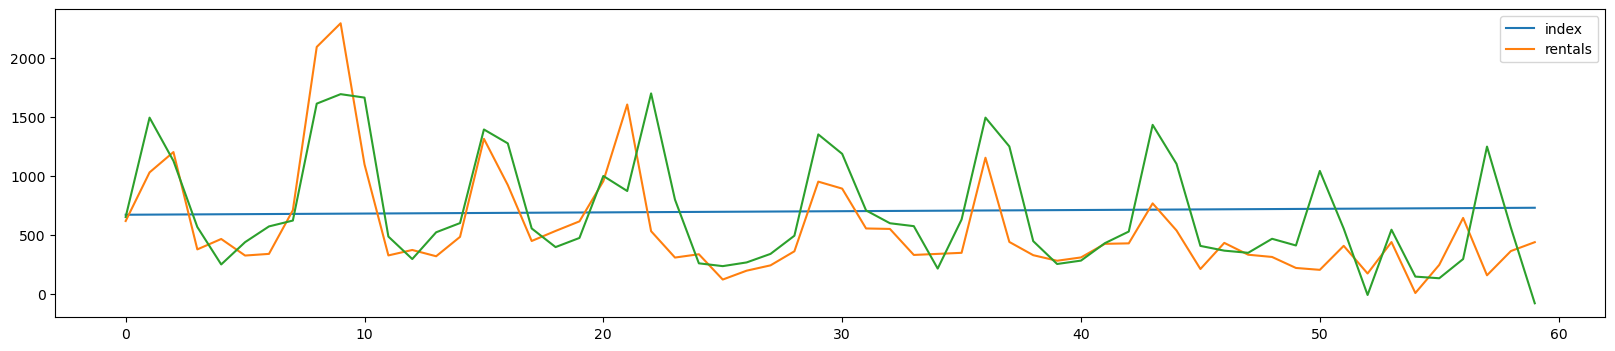

In [127]:
yts.reset_index().plot(figsize=(20,4))
pd.Series(p_lr.ravel()).plot(figsize=(20,4))
# Add title
#plt.title(var)
# the y axis label
#plt.ylabel(var)
plt.legend()
plt.show()

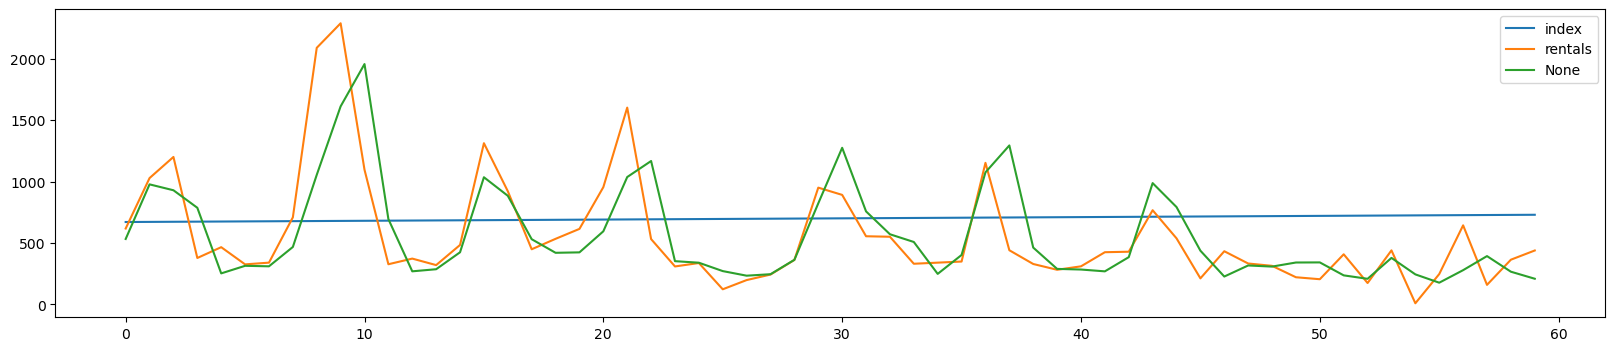

In [136]:
yts.reset_index().plot(figsize=(20,4))
pd.Series(p_rf.ravel()).plot(figsize=(20,4))
# Add title
#plt.title(var)
# the y axis label
#plt.ylabel(var)
plt.legend()
plt.show()